##  Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Targets

In [27]:
def stage_of_apnoe(x):
    if x < 5:
        return 0 # норма
    elif 5 <= x <= 15:
        return 1 # легкая тяжесть
    elif 15 < x <= 30:
        return 2 # средняя форма
    else:
        return 3 # тяжелая форма
info_target_df = pd.read_parquet('sleep_target.parquet')
info_target_df['stage_target'] = info_target_df['AHI'].apply(stage_of_apnoe)

feature_columns = ['n_user', 'type', 'n_exp', 'signal',	'age', 'gender', 'height',	'weight', 'pulse', 'bp_upper',	'bp_lower']
main_target = ['target']
stage_target = ['stage_target']
ahi_target = ['AHI']

person_agg_df = info_target_df[feature_columns + main_target + stage_target + ahi_target]

In [28]:
person_agg_df['stage_target'].value_counts()

stage_target
0    41
3    20
2    15
1     4
Name: count, dtype: int64

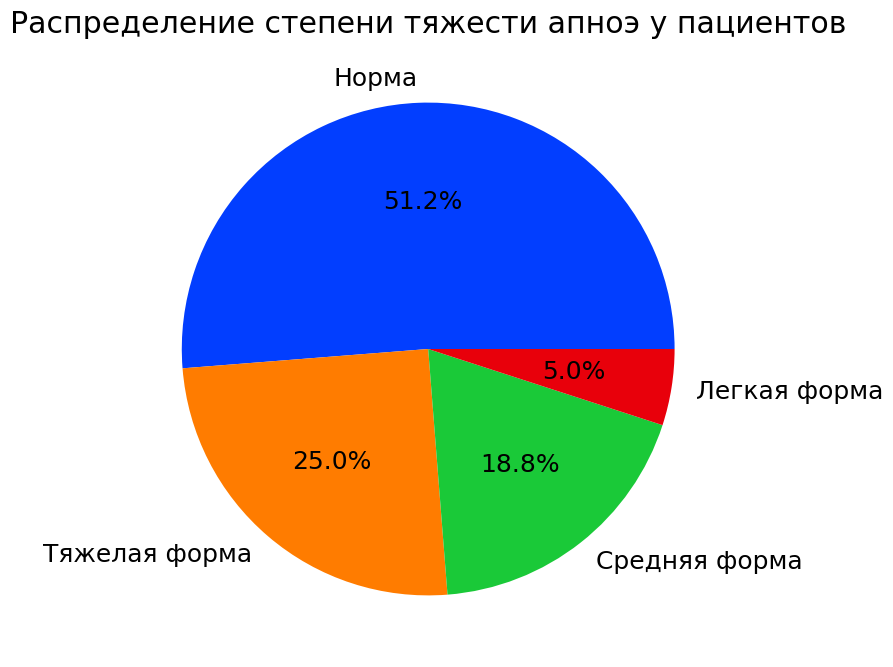

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 18})

temp_agg = person_agg_df.copy()

temp_agg['stage_target'] = temp_agg['stage_target'].replace({0: 'Норма', 1: 'Легкая форма', 2: 'Средняя форма', 3: 'Тяжелая форма'})

palette = palette = sns.color_palette("bright")

plt.figure(figsize=(10, 8))
plt.pie(temp_agg['stage_target'].value_counts(), labels=temp_agg['stage_target'].value_counts().index,
        colors=palette, autopct='%1.1f%%')

plt.title('Распределение степени тяжести апноэ у пациентов')
plt.show()

## Preparing datasets

In [91]:
drop_columns_binary = ['n_user', 'pulse', 'bp_upper', 'bp_lower', 'ODI', 'class', 'num_apnee', 'num_hypeapnea', 'type', 'n_exp', 'AI', 'HI', 'AHI']
drop_columns_stage = ['n_user', 'pulse', 'bp_upper', 'bp_lower', 'ODI', 'target', 'num_apnee', 'num_hypeapnea', 'type', 'n_exp', 'AI', 'HI', 'AHI']
drop_columns_ahi = ['n_user', 'pulse', 'bp_upper', 'bp_lower', 'ODI', 'target', 'class', 'num_apnee', 'num_hypeapnea', 'type', 'n_exp', 'AI', 'HI']
drop_columns_num_apnee = ['n_user', 'pulse', 'bp_upper', 'bp_lower', 'ODI', 'target', 'class', 'num_hypeapnea', 'type', 'n_exp', 'AI', 'HI', 'AHI']
pd.set_option('display.max_columns', 500)

binary_target = ['target']
stage_target = ['class']
ahi_target = ['AHI']
num_apnee_target = ['num_apnee'] # Учим только на тех у кого target == 1
dataset = pd.read_parquet('data_final.parquet')

cat_features = ['gender']

In [85]:
dataset_binary = dataset.drop(drop_columns_binary, axis=1)
dataset_binary.head(1)

,age,gender,height,weight,target,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194
0,29,M,187,91.0,0,32496.0,-2470.0,2224.0,0.16712,80.015826,-449.0,-217.0,-112.0,115.0,228.0,419.0,104694.0,0.016109,-2395.0,2224.0,0.168985,94.129439,-428.0,-262.0,-145.0,147.0,284.0,461.0,38096.0,0.017585,-2168.0,1785.0,0.166337,65.507143,-388.0,-166.0,-92.0,95.0,176.0,347.0,29382.0,0.013563,-2470.0,1331.0,0.166038,77.820693,-597.0,-185.0,-100.0,105.0,197.0,385.0,24561.0,0.011337,-1.877985,2.73506,0.16712,0.47111,-1.788231,-0.980447,-0.42896,0.797447,1.374754,2.599029,2.0,0.02,-0.585518,1.028003,0.168673,0.287754,-0.578233,-0.512662,-0.233481,0.628145,0.95048,1.020251,0.0,0.0,-0.971381,1.361014,0.187583,0.405307,-0.954011,-0.797683,-0.368162,0.919953,1.311437,1.356056,0.0,0.0,-1.877985,2.73506,0.145752,0.641954,-1.844139,-1.539521,-0.581882,0.674581,2.169035,2.678457,2.0,0.058824,27519.0,-3058.0,2467.0,0.23986,57.851642,-279.0,-153.0,-87.0,87.0,157.0,294.0,75081.0,0.013642,-748.0,646.0,0.264753,64.205486,-263.0,-170.0,-102.0,103.0,181.0,303.0,25210.0,0.013741,-1618.0,1727.0,0.240635,58.520193,-271.0,-151.0,-90.0,91.0,156.0,275.0,22351.0,0.012183,-3058.0,2467.0,0.214191,49.934744,-328.0,-119.0,-66.0,66.0,117.0,306.401,19537.0,0.010649,-0.99266,1.467095,0.23986,0.269062,-0.974557,-0.811633,-0.030797,0.58688,1.211924,1.441578,4.0,0.04,-0.196846,0.751572,0.262448,0.159686,-0.190221,-0.130599,0.048919,0.53096,0.697634,0.746178,1.0,0.030303,-0.809804,1.209346,0.241846,0.307696,-0.791752,-0.629286,-0.152378,0.674857,1.045294,1.192941,2.0,0.060606,-0.99266,1.467095,0.216007,0.308568,-0.960815,-0.674214,0.003294,0.361106,1.103183,1.430704,2.0,0.058824


In [82]:
dataset_stage = dataset.drop(drop_columns_stage, axis=1)
dataset_stage.head(1)

,age,gender,height,weight,class,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194
0,29,M,187,91.0,0,32496.0,-2470.0,2224.0,0.16712,80.015826,-449.0,-217.0,-112.0,115.0,228.0,419.0,104694.0,0.016109,-2395.0,2224.0,0.168985,94.129439,-428.0,-262.0,-145.0,147.0,284.0,461.0,38096.0,0.017585,-2168.0,1785.0,0.166337,65.507143,-388.0,-166.0,-92.0,95.0,176.0,347.0,29382.0,0.013563,-2470.0,1331.0,0.166038,77.820693,-597.0,-185.0,-100.0,105.0,197.0,385.0,24561.0,0.011337,-1.877985,2.73506,0.16712,0.47111,-1.788231,-0.980447,-0.42896,0.797447,1.374754,2.599029,2.0,0.02,-0.585518,1.028003,0.168673,0.287754,-0.578233,-0.512662,-0.233481,0.628145,0.95048,1.020251,0.0,0.0,-0.971381,1.361014,0.187583,0.405307,-0.954011,-0.797683,-0.368162,0.919953,1.311437,1.356056,0.0,0.0,-1.877985,2.73506,0.145752,0.641954,-1.844139,-1.539521,-0.581882,0.674581,2.169035,2.678457,2.0,0.058824,27519.0,-3058.0,2467.0,0.23986,57.851642,-279.0,-153.0,-87.0,87.0,157.0,294.0,75081.0,0.013642,-748.0,646.0,0.264753,64.205486,-263.0,-170.0,-102.0,103.0,181.0,303.0,25210.0,0.013741,-1618.0,1727.0,0.240635,58.520193,-271.0,-151.0,-90.0,91.0,156.0,275.0,22351.0,0.012183,-3058.0,2467.0,0.214191,49.934744,-328.0,-119.0,-66.0,66.0,117.0,306.401,19537.0,0.010649,-0.99266,1.467095,0.23986,0.269062,-0.974557,-0.811633,-0.030797,0.58688,1.211924,1.441578,4.0,0.04,-0.196846,0.751572,0.262448,0.159686,-0.190221,-0.130599,0.048919,0.53096,0.697634,0.746178,1.0,0.030303,-0.809804,1.209346,0.241846,0.307696,-0.791752,-0.629286,-0.152378,0.674857,1.045294,1.192941,2.0,0.060606,-0.99266,1.467095,0.216007,0.308568,-0.960815,-0.674214,0.003294,0.361106,1.103183,1.430704,2.0,0.058824


In [84]:
dataset_ahi = dataset.drop(drop_columns_ahi, axis=1)
dataset_ahi.head(1)

,age,gender,height,weight,AHI,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194
0,29,M,187,91.0,0.0,32496.0,-2470.0,2224.0,0.16712,80.015826,-449.0,-217.0,-112.0,115.0,228.0,419.0,104694.0,0.016109,-2395.0,2224.0,0.168985,94.129439,-428.0,-262.0,-145.0,147.0,284.0,461.0,38096.0,0.017585,-2168.0,1785.0,0.166337,65.507143,-388.0,-166.0,-92.0,95.0,176.0,347.0,29382.0,0.013563,-2470.0,1331.0,0.166038,77.820693,-597.0,-185.0,-100.0,105.0,197.0,385.0,24561.0,0.011337,-1.877985,2.73506,0.16712,0.47111,-1.788231,-0.980447,-0.42896,0.797447,1.374754,2.599029,2.0,0.02,-0.585518,1.028003,0.168673,0.287754,-0.578233,-0.512662,-0.233481,0.628145,0.95048,1.020251,0.0,0.0,-0.971381,1.361014,0.187583,0.405307,-0.954011,-0.797683,-0.368162,0.919953,1.311437,1.356056,0.0,0.0,-1.877985,2.73506,0.145752,0.641954,-1.844139,-1.539521,-0.581882,0.674581,2.169035,2.678457,2.0,0.058824,27519.0,-3058.0,2467.0,0.23986,57.851642,-279.0,-153.0,-87.0,87.0,157.0,294.0,75081.0,0.013642,-748.0,646.0,0.264753,64.205486,-263.0,-170.0,-102.0,103.0,181.0,303.0,25210.0,0.013741,-1618.0,1727.0,0.240635,58.520193,-271.0,-151.0,-90.0,91.0,156.0,275.0,22351.0,0.012183,-3058.0,2467.0,0.214191,49.934744,-328.0,-119.0,-66.0,66.0,117.0,306.401,19537.0,0.010649,-0.99266,1.467095,0.23986,0.269062,-0.974557,-0.811633,-0.030797,0.58688,1.211924,1.441578,4.0,0.04,-0.196846,0.751572,0.262448,0.159686,-0.190221,-0.130599,0.048919,0.53096,0.697634,0.746178,1.0,0.030303,-0.809804,1.209346,0.241846,0.307696,-0.791752,-0.629286,-0.152378,0.674857,1.045294,1.192941,2.0,0.060606,-0.99266,1.467095,0.216007,0.308568,-0.960815,-0.674214,0.003294,0.361106,1.103183,1.430704,2.0,0.058824


In [87]:
dataset_num_apnee = dataset[dataset['target'] == 1].drop(drop_columns_num_apnee, axis=1)
dataset_num_apnee.head(1)

,age,gender,height,weight,num_apnee,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194
4,62,M,165,75.0,11,28410.0,-7095.0,3947.0,1.112597,67.851993,-447.0,-110.0,-65.0,66.0,106.0,414.0,26237.0,0.004618,-4024.0,2098.0,3.969114,58.037864,-255.0,-101.0,-63.0,71.0,107.0,236.0,6068.0,0.003204,-7095.0,3947.0,-2.54213,81.132909,-595.001,-116.0,-68.0,62.0,105.0,465.0,8961.0,0.004731,-2744.0,2777.0,1.910806,61.956295,-460.0,-113.0,-64.0,64.0,106.0,518.0,11863.0,0.006263,-5.303414,9.539229,1.112597,3.642957,-5.302095,-5.290225,-4.020071,6.628747,8.83351,9.468657,0.0,0.0,-0.709556,7.584249,4.067099,2.018632,-0.6387,-0.000989,1.644759,6.938384,7.447164,7.57054,0.0,0.0,-5.303414,0.649789,-2.59932,1.412951,-5.302988,-5.299151,-5.272404,-0.808071,0.272789,0.612089,0.0,0.0,-3.028317,9.539229,1.847734,3.279356,-3.012919,-2.874335,-2.174266,7.071954,9.303989,9.515705,0.0,0.0,28530.0,-8589.0,13446.0,-0.021676,122.816321,-665.0,-107.0,-60.0,56.0,94.0,976.0,23328.0,0.004088,-2667.0,5644.0,-1.849063,59.297702,-260.0,-95.0,-60.0,56.0,90.0,238.0,5772.0,0.003035,-5849.0,13446.0,1.070889,133.876483,-827.0,-109.0,-62.0,60.0,97.0,933.001,7319.0,0.003848,-8589.0,11088.0,0.713146,154.296284,-853.0,-135.0,-58.0,52.0,96.0,1658.0,10798.0,0.005677,-7.070505,26.768121,-0.021676,4.50915,-7.05156,-6.881058,-3.897512,8.991817,16.070743,25.698383,3.0,0.03,-7.070505,8.962794,-1.857402,2.629013,-7.064381,-7.00927,-6.472699,-0.11081,6.18895,8.685409,1.0,0.030303,-4.509884,26.768121,1.057708,6.410517,-4.487507,-4.286109,-3.443267,14.84068,23.310383,26.422347,1.0,0.030303,-2.50701,13.473852,0.71242,2.87512,-2.50411,-2.478006,-2.039931,6.030967,11.44888,13.271355,1.0,0.029412


# Train Predict

In [143]:
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

In [144]:
def fit_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## Binary Classification

In [161]:
dataset_not_na = dataset_binary.dropna()
X_train, X_test, y_train, y_test = train_test_split(
    dataset_not_na.drop('target', axis=1),
    dataset_not_na['target'],
    test_size=0.2,
    stratify=dataset_not_na['target'],
    random_state=42,
    shuffle=True)

## LogisticRegression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender'] = label_encoder.transform(X_test['gender'])

log_reg_binary = LogisticRegression(penalty='l2', random_state=42,)

fit_predict(log_reg_binary, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.67      1.00      0.80         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Gradient Boosting

In [146]:
catboost_binary = CatBoostClassifier(iterations=1000,
                           depth=5,
                           learning_rate=0.15,
                           verbose=100,
                           cat_features=cat_features,
                           )

fit_predict(catboost_binary, X_train, X_test, y_train, y_test)

0:	learn: 0.5788127	total: 24.4ms	remaining: 24.3s
100:	learn: 0.0050849	total: 2.45s	remaining: 21.8s
200:	learn: 0.0023091	total: 3.84s	remaining: 15.3s
300:	learn: 0.0017772	total: 5.32s	remaining: 12.3s
400:	learn: 0.0017772	total: 6.76s	remaining: 10.1s
500:	learn: 0.0017772	total: 7.86s	remaining: 7.83s
600:	learn: 0.0017772	total: 8.58s	remaining: 5.7s
700:	learn: 0.0017772	total: 9.28s	remaining: 3.96s
800:	learn: 0.0017772	total: 9.99s	remaining: 2.48s
900:	learn: 0.0017772	total: 10.7s	remaining: 1.17s
999:	learn: 0.0017772	total: 11.4s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



## MLP

In [166]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [196]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report

# Assume X_train, X_test, y_train, y_test are already defined

num_epochs = 300
input_dim, hidden_size, output_dim = X_train.shape[1], 64, 1

# Define the MLP model
mlp_binary = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),
    nn.BatchNorm1d(hidden_size),
    nn.Linear(hidden_size, output_dim)
)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(mlp_binary.parameters(), lr=0.0001, weight_decay=0.01)

# Define the dataset class
class MlpApnoeDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return {
            'inputs': torch.tensor(self.features.iloc[idx, :].tolist(), dtype=torch.float),
            'labels': torch.tensor(self.targets.iloc[idx].tolist(), dtype=torch.float)
        }

mlp_train_dataset = MlpApnoeDataset(X_train, y_train)
mlp_test_dataset = MlpApnoeDataset(X_test, y_test)
train_dataloader = DataLoader(mlp_train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(mlp_test_dataset, batch_size=1, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0
    mlp_binary.train()

    for batch in train_dataloader:
        optimizer.zero_grad()
        features = batch['inputs']
        labels = batch['labels'].unsqueeze(1)

        outputs = mlp_binary(features)
        loss = criterion(outputs, labels)
        epoch_loss += loss.item()

        loss.backward()
        optimizer.step()

    if (epoch % 100) == 0:
        print(f'epoch_loss {epoch + 1} = {epoch_loss / len(train_dataloader)}')

        # Evaluation step
        mlp_binary.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for batch in test_dataloader:
                features = batch['inputs']
                labels = batch['labels'].unsqueeze(1)

                outputs = mlp_binary(features)
                preds = torch.sigmoid(outputs).round()

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Calculate classification report
        print(classification_report(all_labels, all_preds, target_names=['class 0', 'class 1']))


epoch_loss 1 = 0.6905943751335144
              precision    recall  f1-score   support

     class 0       0.71      0.62      0.67         8
     class 1       0.67      0.75      0.71         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16

epoch_loss 101 = 0.3170875236392021
              precision    recall  f1-score   support

     class 0       0.78      0.88      0.82         8
     class 1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

epoch_loss 201 = 0.14965286975105604
              precision    recall  f1-score   support

     class 0       0.78      0.88      0.82         8
     class 1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.

## LSTM classification

In [ ]:
data_signals_df = pd.read_parquet('dataSignals.parquet')

In [204]:
data_signals_df['type'].value_counts()

type
_o1-m2    39
_o2-m1    39
Name: count, dtype: int64

In [222]:
targets = dataset[['n_user', 'n_exp', 'target']]
targets

,n_user,n_exp,target
0,6,1,0
1,7,1,0
2,14,1,0
3,15,1,0
4,21,2,1
...,...,...,...
72,32,1,1
73,39,1,1
74,38,1,1
75,32,2,1


In [ ]:
data_signals_df['n_user'] = data_signals_df['n_user'].str.replace('Np ', '').astype('int')
data_signals_df['n_exp'] = data_signals_df['n_exp'].str.replace('Nr ', '').astype('int')

In [225]:
data_signals_df.head(3)

,n_user,type,n_exp,signal
0,6,_o1-m2,1,"[-35, -37, -34, -34, -33, -30, -30, -28, -25, ..."
1,7,_o1-m2,1,"[0, -1, -1, 0, 0, -1, -1, -1, 0, -2, -2, 0, -2..."
4,14,_o1-m2,1,"[7, 7, 7, 11, 8, 10, 6, 7, 8, 6, 1, 1, 1, -2, ..."


In [226]:
signals_target = data_signals_df.merge(targets, on=['n_user', 'n_exp'])
signals_target

,n_user,type,n_exp,signal,target
0,6,_o1-m2,1,"[-35, -37, -34, -34, -33, -30, -30, -28, -25, ...",0
1,6,_o2-m1,1,"[-7, -7, -7, -9, -9, -10, -8, -8, -8, -8, -8, ...",0
2,7,_o1-m2,1,"[0, -1, -1, 0, 0, -1, -1, -1, 0, -2, -2, 0, -2...",0
3,7,_o2-m1,1,"[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -2, 0, 0...",0
4,14,_o1-m2,1,"[7, 7, 7, 11, 8, 10, 6, 7, 8, 6, 1, 1, 1, -2, ...",0
...,...,...,...,...,...
73,11,_o2-m1,1,"[0, -3, -1, -3, -1, 1, 1, -3, 0, 0, 0, 0, 0, -...",0
74,38,_o2-m1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
75,38,_o1-m2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
76,39,_o2-m1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [214]:
from scipy import stats

def agg_feautres(row, drop_part=12000, parts=300):
    signal = row[drop_part: -drop_part]
    step_size = len(signal) // 300
    splited_signal = [signal[step: step + step_size] for step in range(0, len(signal), step_size)]
    stats_features = []
    for window in splited_signal:
        sublist_np = np.array(window)
        mean = np.mean(sublist_np)
        median = np.median(sublist_np)
        std_dev = np.std(sublist_np)
        variance = np.var(sublist_np)
        min_val = np.min(sublist_np)
        max_val = np.max(sublist_np)
        skewness = stats.skew(sublist_np)
        kurtosis = stats.kurtosis(sublist_np)
        percentiles = np.percentile(sublist_np, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
        stats_features.append(torch.tensor([
            mean,
            median,
            std_dev,
            variance,
            min_val,
            max_val,
            skewness,
            kurtosis,
            percentiles[1],
            percentiles[2],
            percentiles[3],
            percentiles[4],
            percentiles[5],
            percentiles[6],
            percentiles[7],
            percentiles[8],
            percentiles[9],
        ]))
    return stats_features

In [253]:
from tqdm import tqdm

data_signals_df = signals_target.copy()
o1_m2_part = data_signals_df[data_signals_df['type'] == '_o1-m2']
o2_m1_part = data_signals_df[data_signals_df['type'] == '_o2-m1']

final_rnn_dataset = []
for _, row in tqdm(o1_m2_part.iterrows()):
    signal_o1_m2 = row['signal']
    user_o1_m2, exp_o1_m2 = row['n_user'], row['n_exp']

    o2_m1_row = o2_m1_part[(o2_m1_part['n_user'] == user_o1_m2) & (o2_m1_part['n_exp'] == exp_o1_m2)]
    signal_o2_m1 = o2_m1_row['signal'].item()
    user_o1_m1, exp_o1_m2 = o2_m1_row['n_user'], o2_m1_row['n_exp']
    print('test len',len(signal_o2_m1))
    features_o1_m2 = agg_feautres(signal_o1_m2)
    features_o2_m1 = agg_feautres(signal_o2_m1)

    assert o2_m1_row['target'].item() == row['target']
    label = row['target']

    final_feature_list = []
    for i in range(min(len(features_o1_m2), len(features_o2_m1))):
        final_feature = torch.cat([features_o1_m2[i], features_o2_m1[i]])
        final_feature_list.append(final_feature)

    final_feature_list = torch.stack(final_feature_list)
    final_rnn_dataset.append((final_feature_list, label))

0it [00:00, ?it/s]

test len 6655200


1it [00:04,  4.99s/it]

test len 5414400


2it [00:08,  4.18s/it]

test len 5963400


3it [00:10,  3.18s/it]

test len 5761200


4it [00:12,  2.70s/it]

test len 6468000


5it [00:14,  2.48s/it]

test len 5972000


6it [00:16,  2.34s/it]

test len 5938000


7it [00:18,  2.29s/it]

test len 5838000


8it [00:21,  2.45s/it]

test len 6110000


9it [00:23,  2.39s/it]

test len 5859000


10it [00:25,  2.26s/it]

test len 5775600


11it [00:27,  2.16s/it]

test len 5804400


12it [00:29,  2.07s/it]

test len 5782200


13it [00:31,  2.03s/it]

test len 5776200


14it [00:34,  2.16s/it]

test len 5776800


15it [00:36,  2.25s/it]

test len 5973600


16it [00:38,  2.12s/it]

test len 5778600


17it [00:40,  2.06s/it]

test len 5775000


18it [00:42,  2.05s/it]

test len 6531600


19it [00:44,  2.08s/it]

test len 6570000


20it [00:46,  2.17s/it]

test len 5892000


21it [00:49,  2.39s/it]

test len 5818000


22it [00:51,  2.29s/it]

test len 5780400


23it [00:53,  2.19s/it]

test len 5810000


24it [00:55,  2.13s/it]

test len 5888000


25it [00:57,  2.08s/it]

test len 5628000


26it [00:59,  2.09s/it]

test len 5926000


27it [01:02,  2.32s/it]

test len 5764800


28it [01:04,  2.21s/it]

test len 5811600


29it [01:06,  2.10s/it]

test len 5772000


30it [01:08,  2.02s/it]

test len 6012000


31it [01:10,  1.97s/it]

test len 5678000


32it [01:12,  1.93s/it]

test len 6252000


33it [01:14,  2.02s/it]

test len 5900000


34it [01:16,  2.18s/it]

test len 6106000


35it [01:18,  2.10s/it]

test len 5824800


36it [01:20,  2.01s/it]

test len 5770200


37it [01:22,  1.94s/it]

test len 5982000


38it [01:24,  1.93s/it]

test len 5926000


39it [01:26,  2.21s/it]


In [258]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

class RnnDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sequence, label = self.data[idx]
        return sequence[:300], label

labels = [label for _, label in final_rnn_dataset]
train_data, val_data = train_test_split(final_rnn_dataset, test_size=0.2, stratify=labels, random_state=42)

train_dataset = RnnDataset(train_data)
val_dataset = RnnDataset(val_data)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)


import torch.nn as nn

class RnnClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(RnnClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_dim = 34
hidden_dim = 16
output_dim = 2
model = RnnClassifier(input_dim, hidden_dim, output_dim).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for sequences, labels in train_dataloader:
        sequences, labels = sequences.float().to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    if (epoch % 50) == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_dataloader):.4f}")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for sequences, labels in val_dataloader:
            sequences, labels = sequences.float().to(device), labels.to(device)
            outputs = model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    if (epoch % 50) == 0:
        val_accuracy = correct / total
        print(f"Validation Accuracy: {val_accuracy:.4f}")

Epoch [1/300], Loss: 0.7442
Validation Accuracy: 0.5000
Epoch [51/300], Loss: 0.6176
Validation Accuracy: 0.2500
Epoch [101/300], Loss: 0.5884
Validation Accuracy: 0.3750
Epoch [151/300], Loss: 0.5562
Validation Accuracy: 0.3750
Epoch [201/300], Loss: 0.5395
Validation Accuracy: 0.6250
Epoch [251/300], Loss: 0.5187
Validation Accuracy: 0.6250


In [259]:
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for sequences, labels in val_dataloader:
        sequences, labels = sequences.float().to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



### CatBoot Regression tasks for targets AHI, num_apnee

#### AHI

In [261]:
from catboost import CatBoostRegressor

In [294]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_ahi.drop('AHI', axis=1),
    dataset_ahi['AHI'],
    test_size=0.2,
    random_state=32,
    shuffle=True)

In [301]:
cat_boost_ahi = CatBoostRegressor(
                           iterations=500,
                           depth=7,
                           learning_rate=0.15,
                           verbose=100,
                           cat_features=cat_features,
)

In [302]:
cat_boost_ahi.fit(X_train, y_train)

0:	learn: 30.7325179	total: 53.9ms	remaining: 26.9s
100:	learn: 0.3374614	total: 3.56s	remaining: 14s
200:	learn: 0.0070393	total: 8.31s	remaining: 12.4s
300:	learn: 0.0001365	total: 13s	remaining: 8.62s
400:	learn: 0.0000029	total: 17.7s	remaining: 4.38s
499:	learn: 0.0000001	total: 24.2s	remaining: 0us


In [303]:
from sklearn.metrics import mean_absolute_error

8.99145411846979

#### num_apnee

In [317]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_num_apnee.drop('num_apnee', axis=1),
    dataset_num_apnee['num_apnee'],
    test_size=0.2,
    random_state=32,
    shuffle=True)

In [318]:
cat_boost_num_apnee = CatBoostRegressor(
                           iterations=100,
                           depth=3,
                           learning_rate=0.15,
                           verbose=100,
                           cat_features=cat_features,
)

In [319]:
cat_boost_num_apnee.fit(X_train, y_train)
y_pred = cat_boost_ahi.predict(X_test)
mean_absolute_error(y_test, y_pred)

0:	learn: 209.2381025	total: 2.06ms	remaining: 204ms
99:	learn: 1.8794571	total: 388ms	remaining: 0us


62.617465738541846

## CatBoost classification stage

In [320]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_stage.drop('class', axis=1),
    dataset_stage['class'],
    test_size=0.2,
    stratify=dataset_stage['class'],
    random_state=42,
    shuffle=True)

catboost_stage = CatBoostClassifier(iterations=1000,
                           depth=5,
                           learning_rate=0.15,
                           verbose=100,
                           cat_features=cat_features,
                           )

fit_predict(catboost_stage, X_train, X_test, y_train, y_test)

0:	learn: 1.3084488	total: 97ms	remaining: 1m 36s
100:	learn: 0.0846547	total: 4.01s	remaining: 35.7s
200:	learn: 0.0330409	total: 6.9s	remaining: 27.4s
300:	learn: 0.0200862	total: 10.9s	remaining: 25.2s
400:	learn: 0.0141461	total: 16.4s	remaining: 24.4s
500:	learn: 0.0108896	total: 20.7s	remaining: 20.7s
600:	learn: 0.0089222	total: 23.8s	remaining: 15.8s
700:	learn: 0.0074808	total: 26.6s	remaining: 11.3s
800:	learn: 0.0064765	total: 28.4s	remaining: 7.05s
900:	learn: 0.0057172	total: 31.8s	remaining: 3.5s
999:	learn: 0.0051316	total: 33.7s	remaining: 0us
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.50      1.00      0.67         1
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.85      0.83      0.78        16
weighted avg       0.91      0.88      0.86        16
